In [13]:
!pip install ultralytics

In [14]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [15]:
def detect_objects(image_path):
    """
    Detect objects in an image using YOLOv8.
    
    Args:
        image_path: Path to the input image
    
    Returns:
        Detected objects and class labels.
    """
    # Load YOLO model
    model = YOLO("yolo11n-seg.pt") # Load the model
    
    # Read image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Perform detection
    results = model(image_rgb)[0]
    
    # Create a copy of the image for drawing
    annotated_image = image_rgb.copy()
    
    # Generate random colors for classes
    np.random.seed(42)  # For consistent colors
    colors = np.random.randint(0, 255, size=(100, 3), dtype=np.uint8)
    
    # To hold class names and their corresponding colors
    class_labels = {}
    
    # Process detections
    boxes = results.boxes

    return boxes, results.names, annotated_image, colors

In [16]:
img = '/kaggle/input/imagedata/test.jpg'

In [17]:
boxes, names, annotated_image, colors = detect_objects(img)


0: 256x640 2 persons, 10 cars, 1 truck, 5 traffic lights, 123.2ms
Speed: 2.7ms preprocess, 123.2ms inference, 22.7ms postprocess per image at shape (1, 3, 256, 640)


(-0.5, 827.5, 290.5, -0.5)

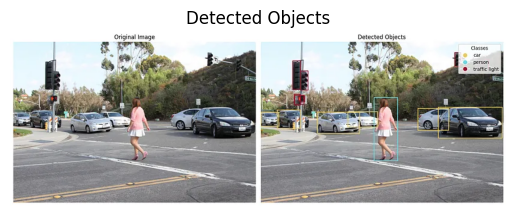

In [18]:
plt.title('Detected Objects')
plt.imshow(annotated_image)
plt.axis('off')


0: 256x640 2 persons, 10 cars, 1 truck, 5 traffic lights, 116.2ms
Speed: 2.6ms preprocess, 116.2ms inference, 21.4ms postprocess per image at shape (1, 3, 256, 640)


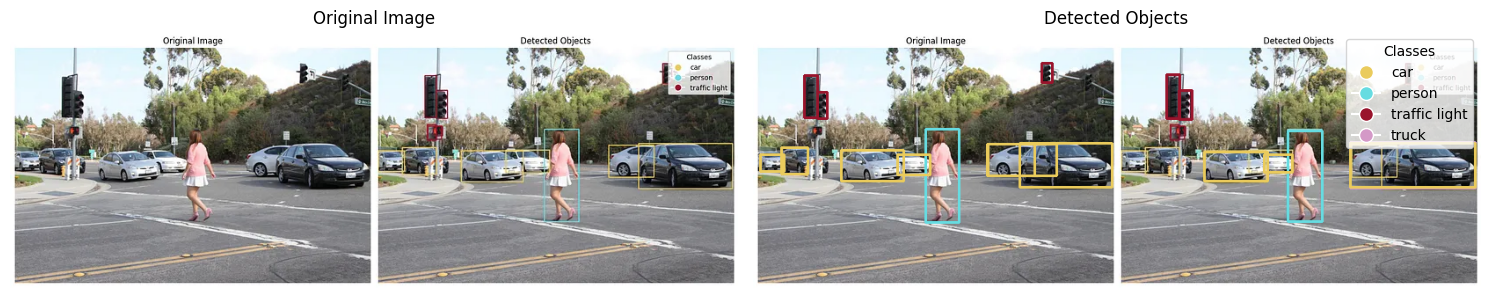

In [19]:
def show_results(image_path, confidence_threshold):
    """
    Show original image and detection results side by side.

    Args:
        image_path: Path to the input image
        confidence_threshold: Minimum confidence score for detections
    """
    # Read original image
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    
    # Get detection results
    boxes, class_names, annotated_image, colors = detect_objects(image_path)
    
    # Process each detected object and apply confidence threshold filtering
    class_labels = {}
    for box in boxes:
        # Get box coordinates
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        
        # Get confidence score
        confidence = float(box.conf[0])
        
        # Only show detections above confidence threshold
        if confidence > confidence_threshold:
            # Get class id and name
            class_id = int(box.cls[0])
            class_name = class_names[class_id]
            
            # Get color for this class
            color = colors[class_id % len(colors)].tolist()
            
            # Draw bounding box
            cv2.rectangle(annotated_image, (x1, y1), (x2, y2), color, 2)
            
            # Store class name and color for legend
            class_labels[class_name] = color
    # Create figure
    plt.figure(figsize=(15, 7))
    
    # Show original image
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original_image)
    plt.axis('off')
    
    # Show detection results
    plt.subplot(1, 2, 2)
    plt.title('Detected Objects')
    plt.imshow(annotated_image)
    plt.axis('off')

    # Create legend
    legend_handles = []
    for class_name, color in class_labels.items():
        normalized_color = np.array(color) / 255.0  # Normalize the color
        legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=class_name,
                                           markerfacecolor=normalized_color, markersize=10))

    plt.legend(handles=legend_handles, loc='upper right', title='Classes')

    plt.tight_layout()
    plt.show()

# Example usage:
show_results(img, confidence_threshold=0.2)

In [33]:
model = YOLO("yolo11n-seg.pt")  # load an official model


In [34]:
result = model(img)


image 1/1 /kaggle/input/imagedata/test.jpg: 256x640 2 persons, 11 cars, 5 traffic lights, 109.3ms
Speed: 2.5ms preprocess, 109.3ms inference, 19.7ms postprocess per image at shape (1, 3, 256, 640)


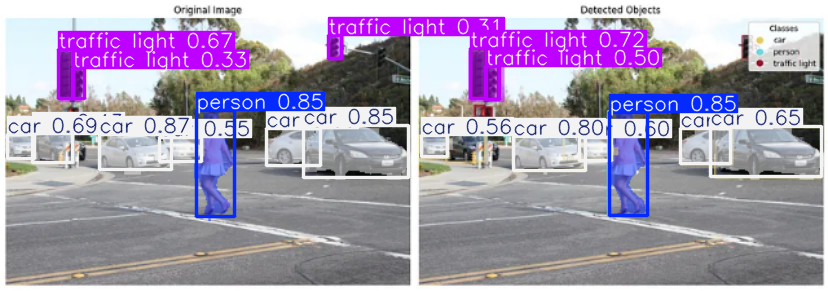

In [35]:
result[0].show()


In [36]:
path = model.export(format="onnx")

Ultralytics 8.3.65 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'yolo11n-seg.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 116, 8400), (1, 32, 160, 160)) (5.9 MB)
requirements: Ultralytics requirements ['onnxslim', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 193.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 181.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 201.5 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 6.7s, installed 2 packages: ['onnxslim', 'onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.47...
ONNX: export success ✅ 9.3s, saved as 'yolo11n-seg.onnx' (11.2 MB)

Export complete (9.9s)
R

In [39]:
img1 = "/kaggle/input/image2/images.jpeg"


0: 640x640 2 persons, 13 cars, 1 truck, 7 traffic lights, 189.7ms
1: 640x640 1 potted plant, 1 laptop, 1 keyboard, 1 cell phone, 189.7ms
Speed: 3.1ms preprocess, 189.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


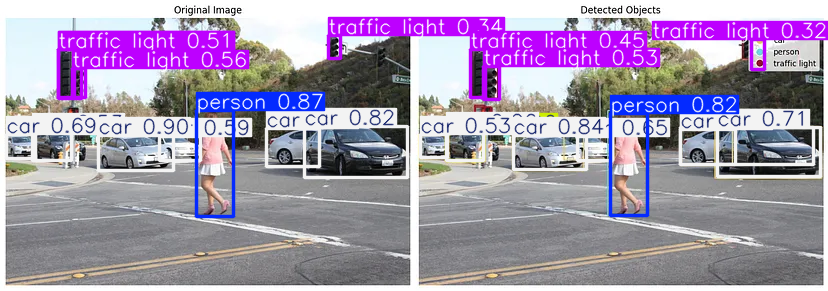

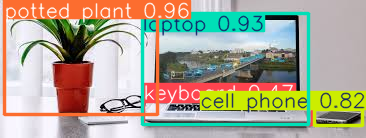

In [40]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")  # pretrained YOLO11n model

# Run batched inference on a list of images
results = model([img,img1])  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk

In [45]:
res = model.predict(img1, save=True, imgsz=320, conf=0.5)



image 1/1 /kaggle/input/image2/images.jpeg: 128x320 1 potted plant, 1 laptop, 33.5ms
Speed: 0.8ms preprocess, 33.5ms inference, 1.0ms postprocess per image at shape (1, 3, 128, 320)
Results saved to runs/detect/predict


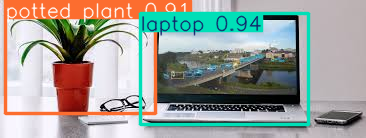

In [46]:
res[0].show()